In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [150]:
# data = pd.read_csv(r"\\wsl.localhost\Ubuntu\home\nngerncha\muic\funcvimp-ab-trees\cpp-ver\results.csv")
data.sample(10)

,i,b,type,implementation,latency
142,142,2,dict,fun,2220
1080749,32173,256,dict,fun,2183
796552,10120,100,dict,fun,2405
737790,16894,16,dict,imp,4255
744408,23512,16,dict,imp,2220
195640,64568,3,dict,fun,2183
84665,19129,2,dict,imp,2183
1270638,25454,2,seq,imp,1258
248788,52180,3,dict,imp,2183
1713439,9503,8,seq,fun,1147


In [151]:
map_data = data[data["type"] == "dict"].drop(["type"], axis=1)
seq_data = data[data["type"] == "seq"].drop(["type"], axis=1)

# map_data

In [152]:
data.shape, map_data.shape, seq_data.shape

((2359296, 5), (1179648, 4), (1179648, 4))

<Axes: xlabel='implementation', ylabel='latency'>

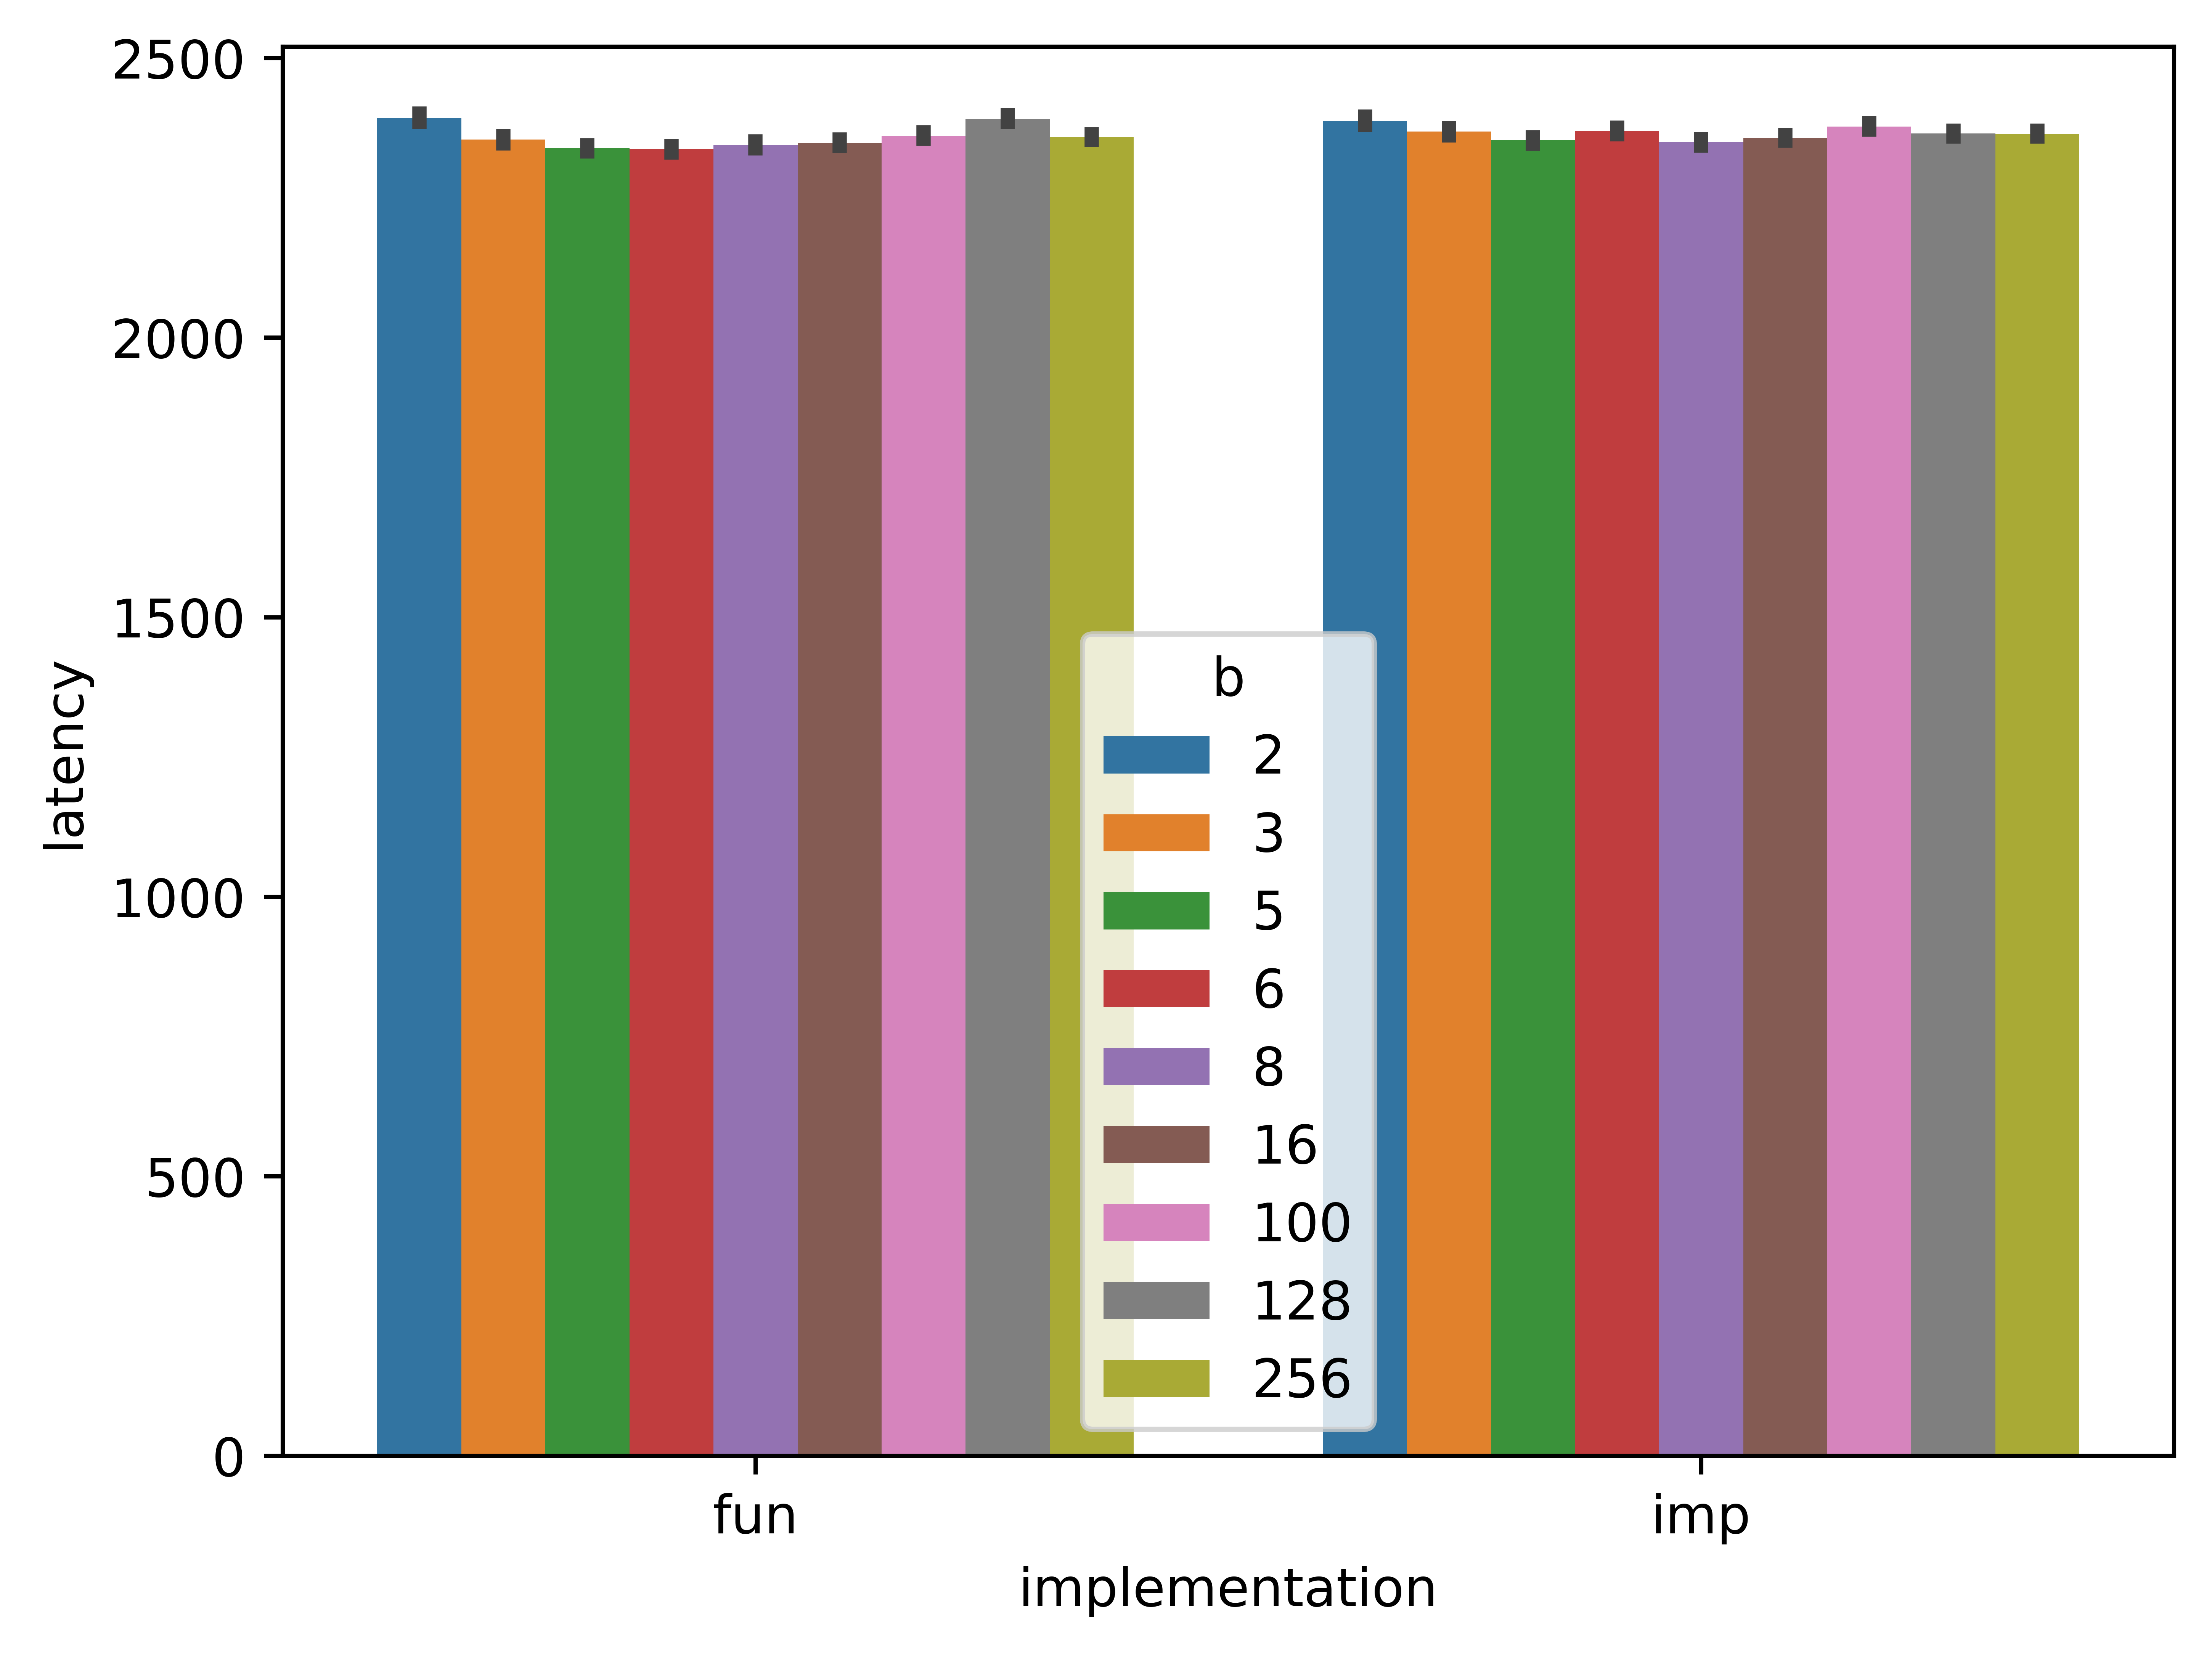

In [153]:
fig, ax = plt.subplots(1, dpi=1000)
sns.barplot(map_data, x="implementation", y="latency", hue="b", ax=ax)

In [154]:
# fig, ax = plt.subplots(1, dpi=1000)
map_data.groupby(["b", "implementation"]).quantile(0.99).drop(["i"], axis=1)

latency
b   implementation         
2   fun             5093.05
    imp             4847.00
3   fun             4723.05
    imp             4736.00
5   fun             4699.00
    imp             4662.00
6   fun             4625.00
    imp             4625.00
8   fun             4575.05
    imp             4551.00
16  fun             4514.00
    imp             4551.00
100 fun             4514.00
    imp             4551.00
128 fun             4588.00
    imp             4514.00
256 fun             4588.00
    imp             4514.00

In [155]:
map_data.groupby(["b", "implementation"]).max().drop(["i"], axis=1)

latency
b   implementation         
2   fun               59718
    imp               49099
3   fun               61457
    imp               51615
5   fun               26751
    imp               27232
6   fun               50357
    imp               50875
8   fun               49099
    imp               49950
16  fun               48211
    imp               49062
100 fun               50764
    imp               48692
128 fun               60199
    imp               25863
256 fun               32301
    imp               35927

In [156]:
seq_data.groupby(["b", "implementation"]).quantile(0.99).drop(["i"], axis=1)

latency
b   implementation         
2   fun              3293.0
    imp              3256.0
3   fun              3145.0
    imp              3256.0
5   fun              3256.0
    imp              3293.0
6   fun              3293.0
    imp              3293.0
8   fun              3182.0
    imp              3256.0
16  fun              3182.0
    imp              3219.0
100 fun              3256.0
    imp              3219.0
128 fun              3256.0
    imp              3293.0
256 fun              3293.0
    imp              3219.0

In [157]:
seq_data.groupby(["b", "implementation"]).max().drop(["i"], axis=1)

latency
b   implementation         
2   fun               46731
    imp               48803
3   fun               25382
    imp               26011
5   fun               28231
    imp               20461
6   fun               87505
    imp               61716
8   fun               47508
    imp               23865
16  fun               34373
    imp               77034
100 fun               53502
    imp               79217
128 fun               47101
    imp               47249
256 fun               59755
    imp               51763

<Axes: xlabel='implementation', ylabel='latency'>

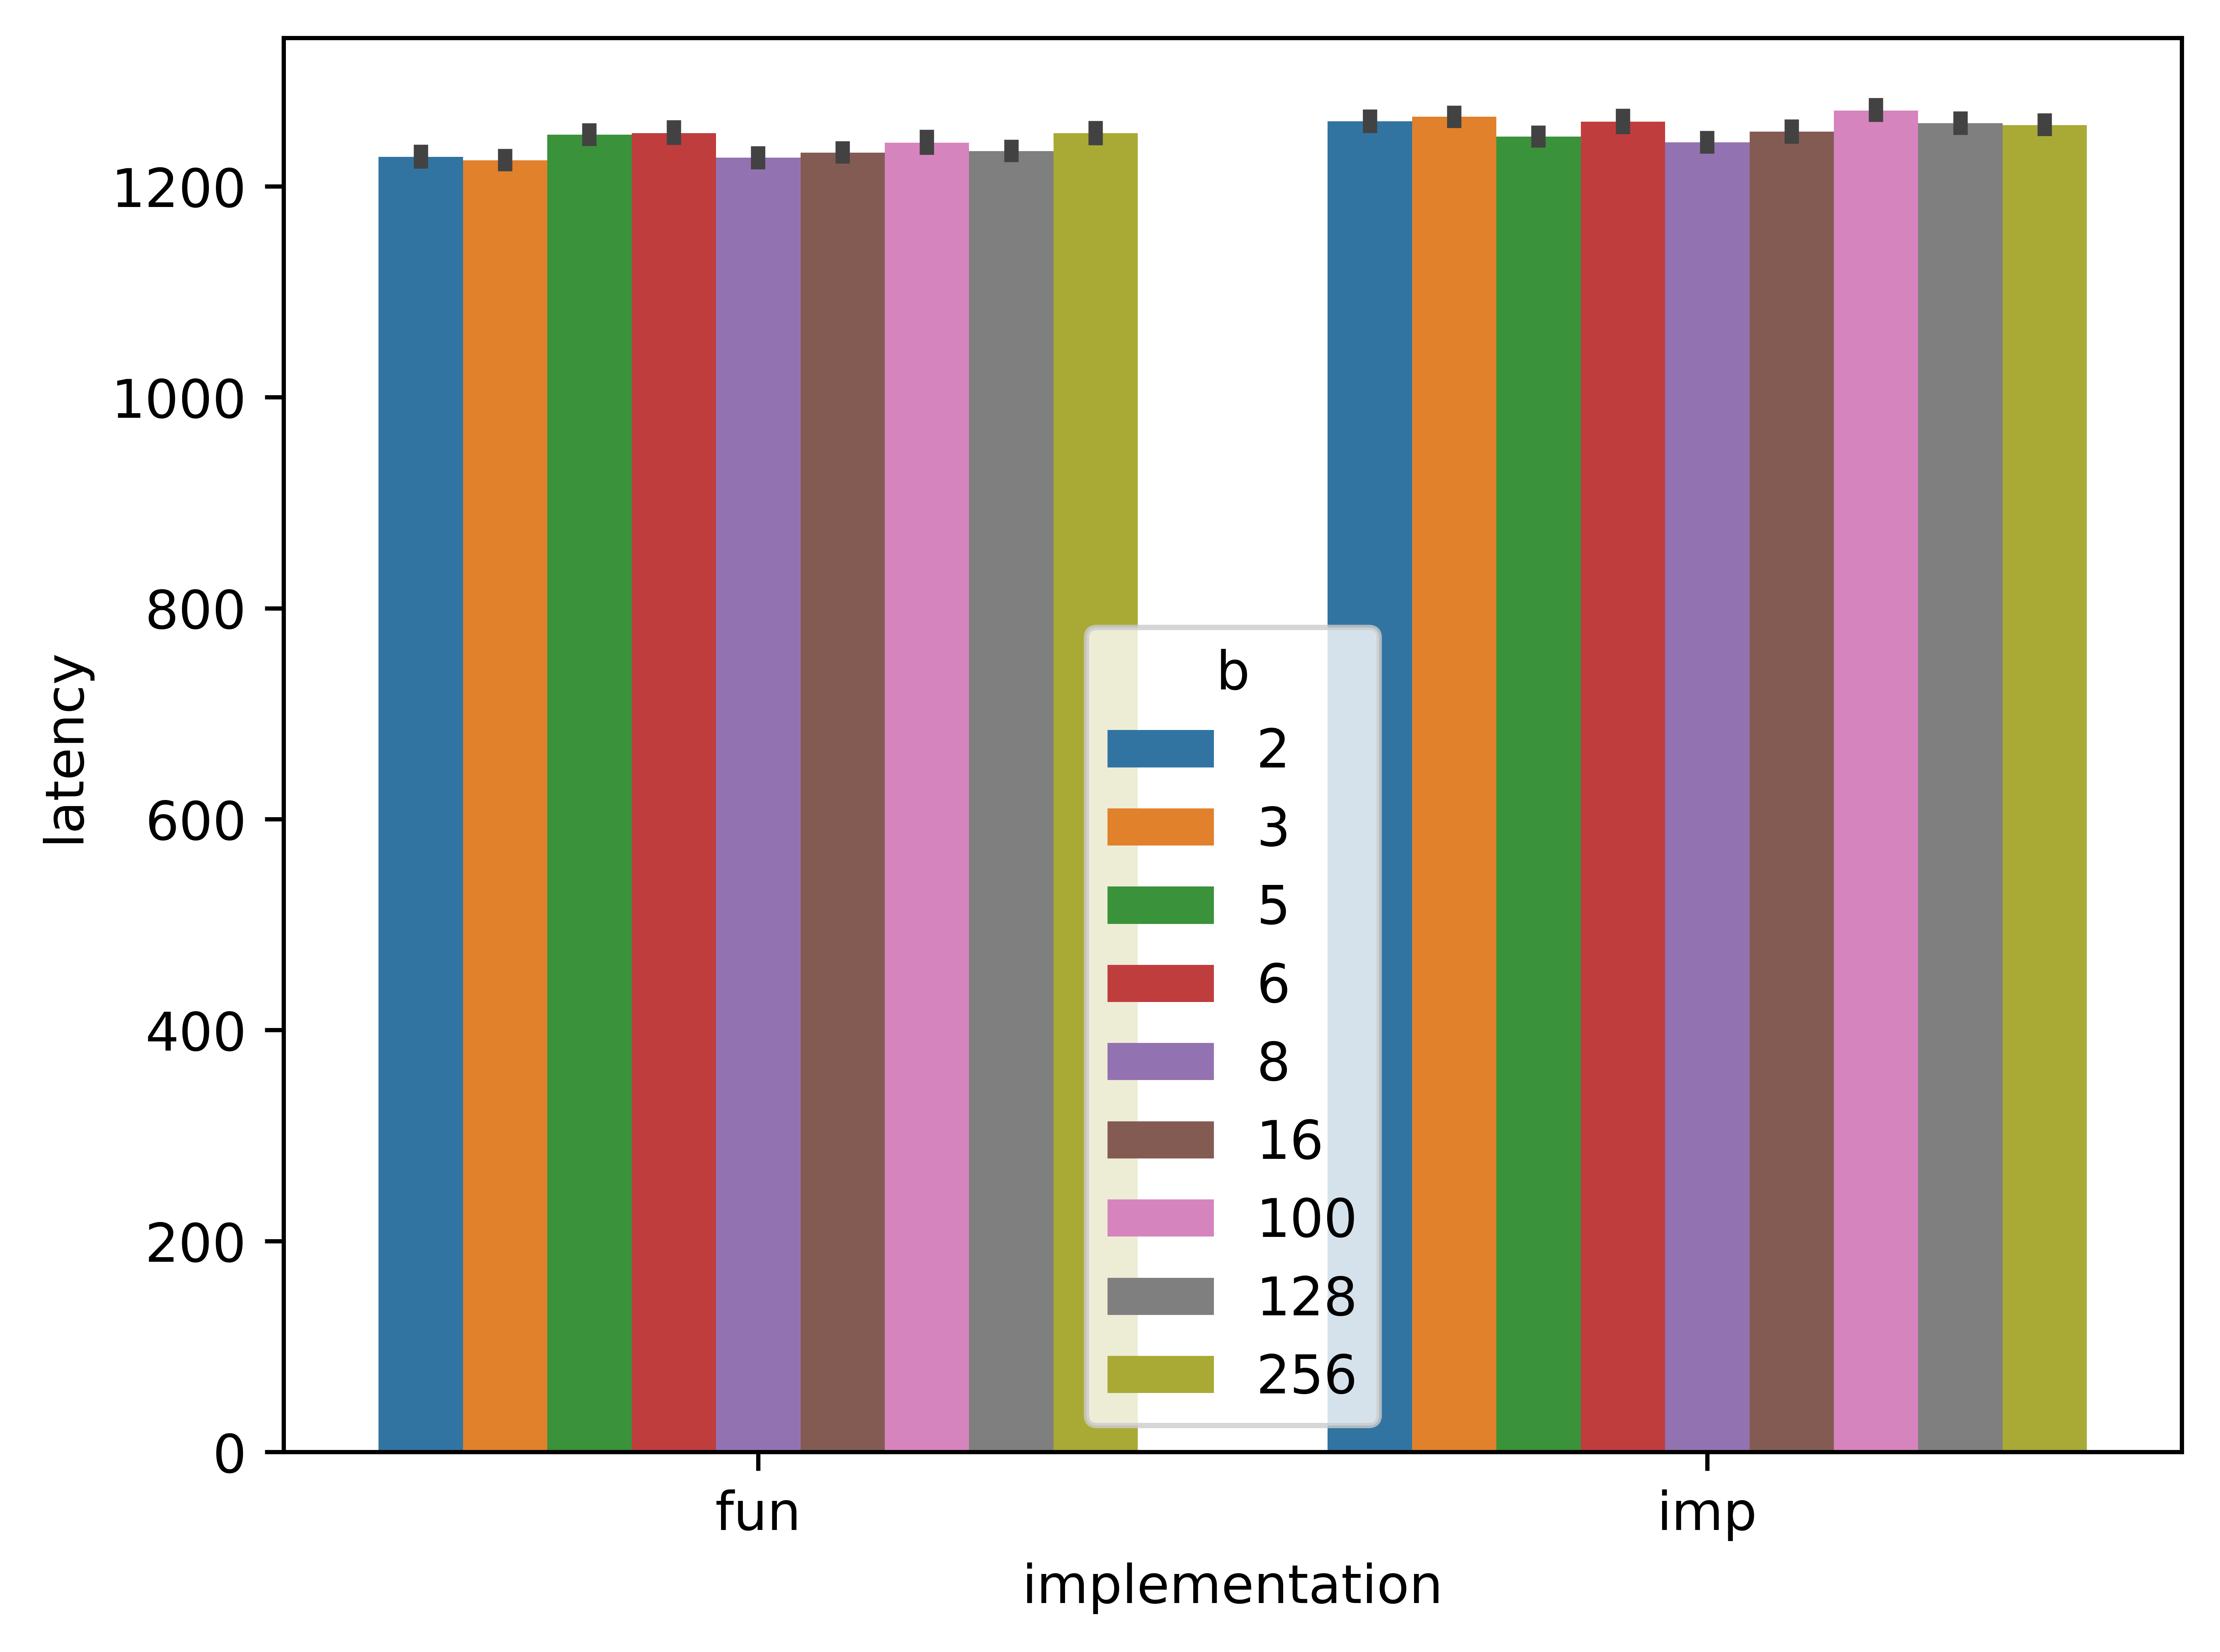

In [158]:
fig, ax = plt.subplots(1, dpi=1000)
sns.barplot(seq_data, x="implementation", y="latency", hue="b", ax=ax)

In [159]:
from numpy import log
from scipy.optimize import minimize

cost = lambda b: b * log(10_000_000) / log(b / 2)
minimize(cost, 10, bounds=[(2, None)])

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 87.62705303472958
        x: [ 5.437e+00]
      nit: 6
      jac: [ 0.000e+00]
     nfev: 18
     njev: 9
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

In [160]:
cost = lambda b: b + log(10_000_000) / log(b)
minimize(cost, 10, bounds=[(1, None)])

C:\Users\nnger\AppData\Local\Temp\ipykernel_12428\2735641350.py:1: RuntimeWarning: divide by zero encountered in divide
  cost = lambda b: b + log(10_000_000) / log(b)


  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 16.53040960587797
        x: [ 9.304e+00]
      nit: 2
      jac: [ 6.518e-01]
     nfev: 8
     njev: 4
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>